# 5-1 결정 트리

신상품으로 캔 와인을 판매하려고 한다!! 그런데 급한 제작과정 때문에 화이트 와인/레드 와인 기입을 못 해버렸다....!!! 알코올 도수, 당도 PH만으로 화이트/레드 와인을 
구별해야 하는데...

In [9]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [10]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


0(음성 클래스):레드 와인, 1(양성 클래스):화이트 와인 이라고 한다!! 일단 info()메서드로 각 열의 데이터 타입과 누락된 데이터가 있는지 확인해보자..!!

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [12]:
wine.head(0)

,alcohol,sugar,pH,class


In [13]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [14]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [15]:
wine['class']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64

In [16]:
wine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
6492    11.2
6493     9.6
6494     9.4
6495    12.8
6496    11.8
Name: alcohol, Length: 6497, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

In [18]:
train_input.shape

(5197, 3)

In [19]:
test_input.shape

(1300, 3)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


점수가 그렇네 높지는 않네... 분류가 어려운가 보다..두 점수다 낮으니 과소적합된거고 뭘 어떻게 .... 올릴까 

In [22]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


레드 와인이 음성 클래스이므로 ph가 높으면 레드와인일 확률이 높아진다는 것을 알 수 있다

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.86


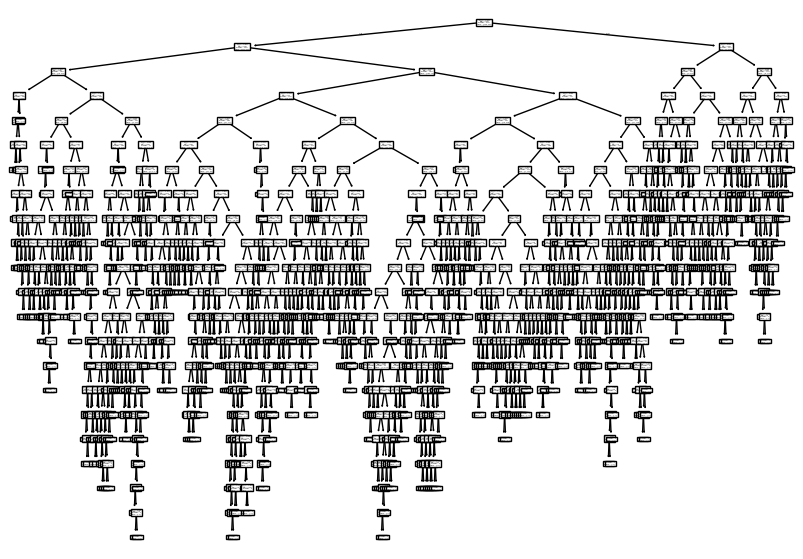

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) #가로 10인치 세로 7인치를 의미 
plot_tree(dt) #결정트리 모델을 시각화 하는 함수
plt.show()

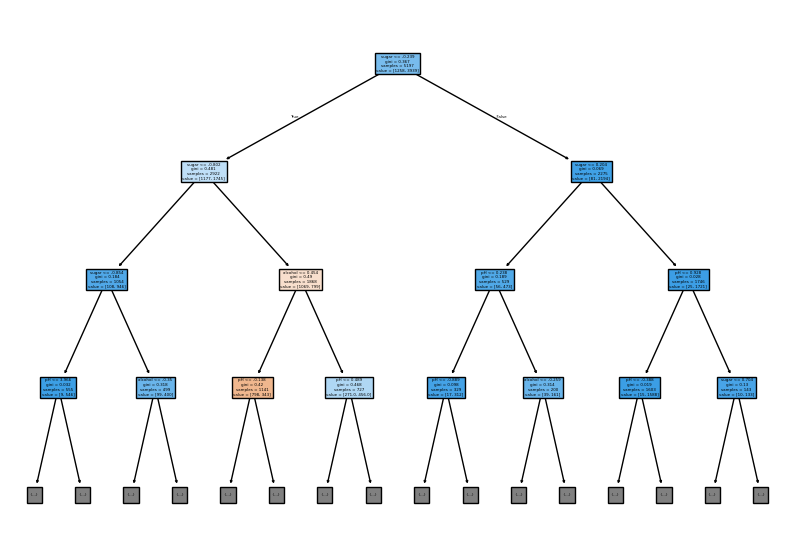

In [32]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH']) #특정 클래스의 비율이 높아지면 진한색으로 표시 
plt.show()

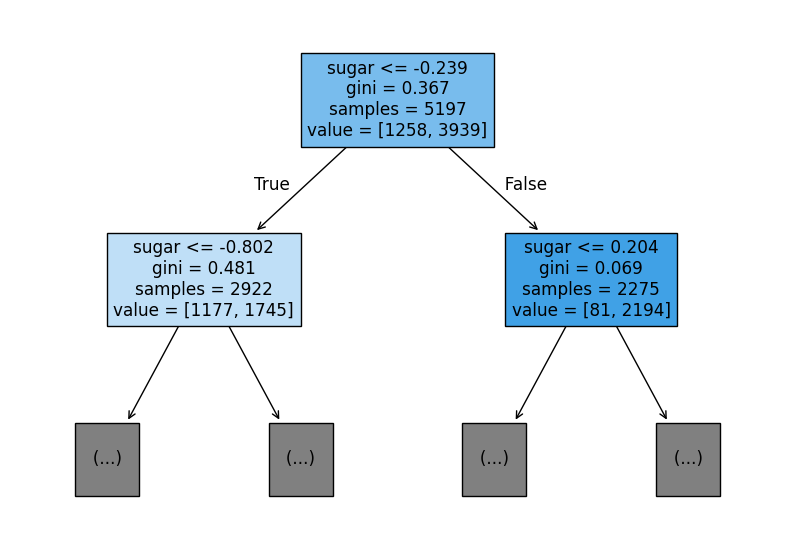

In [35]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH']) #이번에는 리프노브가 depth=3이기 때문에 검정 땡떙떙이 없음
plt.show()

In [36]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


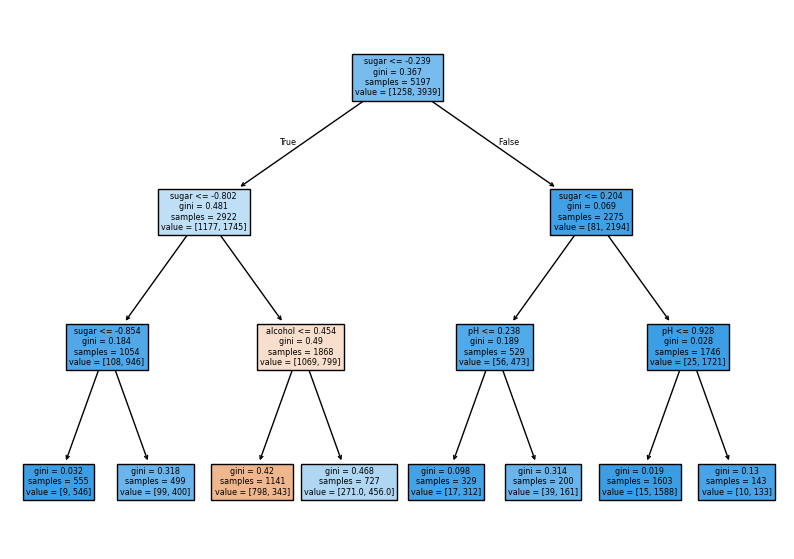

In [37]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH']) #특정 클래스의 비율이 높아지면 진한색으로 표시 
plt.show()

In [38]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


결과가 같음 왜냐하면 비율로 나누기 때문에 스케일이 계산에 영향을 안 끼치기 때문!

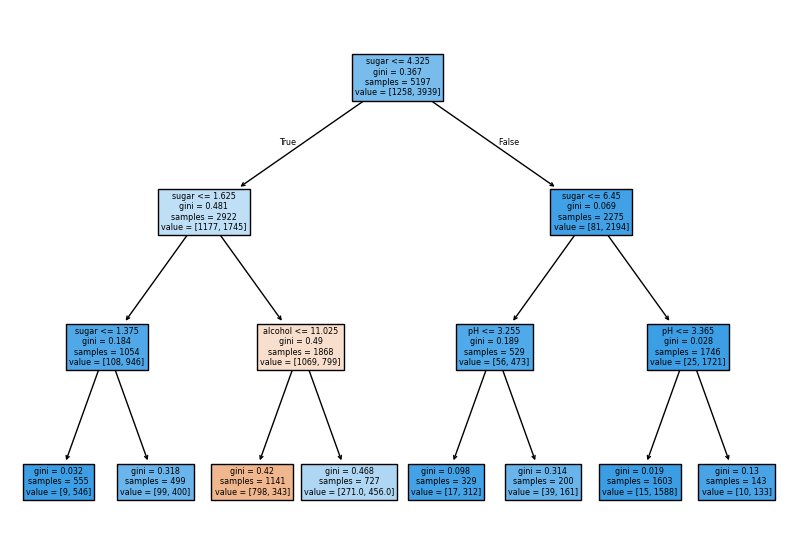

In [40]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH']) #특정 클래스의 비율이 높아지면 진한색으로 표시 
plt.show()

In [41]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


두번째 특성인 당도의 중요성이 제일 높음 트리에서 깊이 1의 분류 기준으로 나왔기 때문에

# 5-2 교차 검증과 그리드 서치

일반화 성능을 올바르게 예측하기 위해서는 가능한 테스트 세트를 사용하지 않아야 한다 -> 검증 세트 필요 

In [43]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [44]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [45]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [51]:
data[:5]
target[:5]  #주피터는 마지막 값만 출력하는구만 

array([0., 0., 0., 0., 0.])

In [52]:
print(data[:5])
print(target[:5]) #이케 하면 해결 된다 ...

[[9.4  1.9  3.51]
 [9.8  2.6  3.2 ]
 [9.8  2.3  3.26]
 [9.8  1.9  3.16]
 [9.4  1.9  3.51]]
[0. 0. 0. 0. 0.]


In [64]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, test_size=0.2)

In [65]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)

In [66]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.8625


In [70]:
from sklearn.model_selection import cross_validate #교차 검증 함수
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01051283, 0.01000214, 0.01301765, 0.00699782, 0.0069983 ]), 'score_time': array([0.002002  , 0.00200081, 0.00098467, 0.00099874, 0.00099778]), 'test_score': array([0.87307692, 0.85384615, 0.87295476, 0.85370549, 0.8373436 ])}


fit_time: 모델을 훈련하는 시간, score_time: 모델을 검증하는 시간, test_score: 기본적으로 5-폴드 교차 검증이기에 5개의 점수를 평균하여 얻어낸 것임 test라  
적혀있지만 검증 폴드의 점수임

In [72]:
import numpy as np
print(np.mean(scores['test_score']))

0.8581853853557415


회귀 모델: KFold 분할기, 분류 모델: StratifiedKFold 

In [74]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold()) #회귀라면 cv=KFold()해주면 됨
print(np.mean(scores['test_score']))

0.8566474790849188


In [76]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #10-폴드 교차 검증, 섞기
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8593437824218171


In [77]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

In [78]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)

min_impurity_decrease: 노드를 분할할 때 최소 불순도 감소 기준, n_jobs:-1로 설정하면 모든 가용 CPU 코어를 사용하여 속도를 높임  
cv=5는 데이터를 5개 그룹으로 나눠서 5번의 교차 검증을 수행하는 것을 의미함 그럼 params의 값이 5개니까 0.0001부터 5개씩 총 5*5=25개의 모델을 훈련함

In [79]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [81]:
dt = gs.best_estimator_ #best_estimator_: 가장 성능이 좋은 모델
print(dt.score(train_input, train_target))

0.9615162593804117


그리드 서치는 훈련이 끝나면 25개의 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련함  
그리드 서치로 찾은 최적의 매개변수는 best_params_속성에 저장 돼 있음

In [82]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [84]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


0.0001에 대해 총 5개의 폴드로 학습과 검증이 이루어짐  
5개의 모델 점수의 평균이 mean_test_score에 출력  
각 하이퍼파라미터 값에 대해 교차 검증을 통해 평균 점수가 계산되며, 최적의 값이 선택됨

In [87]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [93]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), #Numpy 배열과 array 모듈 배열은 서로 다른 자료형
          'max_depth':range(5,20,1),
          'min_samples_split':range(2,100,10) #노드를 나누기 위한 최소 샘플 수 
         }

교차 검증 횟수는 9*15*10=1350 기본 5폴드 교차 검증이므로 만들어지는 모델 수는 6750

In [94]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [95]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [97]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [98]:
from scipy.stats import uniform, randint #import 하는 것들 주어진 범위에서 고르게 뽑음 "균등 분포에서 샘플링한다" 순서대로 정수, 실수

In [102]:
rgen = randint(0,10) #0부터 9까지의 정수를 균등한 확률로 생성
rgen.rvs(10) #10개의 랜덤 샘플을 반환(중복 포함)

array([2, 9, 4, 1, 2, 1, 6, 1, 6, 6], dtype=int64)

In [103]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([103,  97,  96, 118,  93,  83,  97, 103, 105, 105], dtype=int64))

rvs(1000) 이제 1000개를 뽑을 건데 각 뽑힌것마다 count한게 return_counts=True이거 => 골고루 뽑혔다는 것을 알려주고 싶음 

In [104]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.43802371, 0.88231037, 0.51839705, 0.2192258 , 0.97263802,
       0.85796355, 0.00940802, 0.62599449, 0.32857592, 0.03325245])

In [106]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001), #Numpy 배열과 array 모듈 배열은 서로 다른 자료형
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25), #노드를 나누기 위한 최소 샘플 수
          'min_samples_leaf':randint(1,25), #리프 노드가 되기 위한 최소 샘플 수
         }

In [108]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42) #params에 정의된 매개변수 범위에서 n_iter=100을 샘플링
gs.fit(train_input, train_target) 

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BA6BAF4F0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019BA6BAEF20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BA6BAE290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019BA6BAD5A0>},
                   random_state=42)

In [109]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [110]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [111]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# 5-3 트리의 앙상블

이제는 베스트 머신러닝 알고리즘을 찾아봐야 한다...